# Predicting House Prices

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline

<hr>

**[Problem 1] Feature selection for practice**

<hr>

In [2]:
data = pd.read_csv("train.csv")

df = pd.concat([data["GrLivArea"], data["YearBuilt"], data["SalePrice"]], axis=1)

df


,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
 1   YearBuilt  1460 non-null   int64
 2   SalePrice  1460 non-null   int64
dtypes: int64(3)
memory usage: 34.3 KB


In [4]:
df.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


In [5]:
df.isnull().sum()

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64

<hr>

**[Problem 2] Estimation and evaluation by linear regression**

<hr>

## X_train, X_test, y_train, y_test (StandardScaler)

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.loc[:, ["GrLivArea","YearBuilt"]]
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)

reg = LinearRegression().fit(X_train_trans, y_train)
reg_pred = reg.predict(X_test_trans)

reg_pred



array([130445.81129484, 306448.48211547,  88741.8324304 , 168496.12883044,
       227800.17562669,  99569.77660678, 186783.75135889, 182056.44293199,
        97457.76006969, 151960.15487048, 131192.06213304, 117840.59883308,
        84836.16656948, 216795.82827786, 226861.55984128, 114354.20681418,
       233851.35381306, 133362.46046392,  79874.70207186, 210577.06633379,
       191870.90367478, 226090.42299764, 212412.50678112, 110884.40546558,
       201927.81582345, 174203.21527073, 201986.40724909,  98966.53796861,
       215765.02046252, 202036.70333958,  89328.69003012, 262849.94729844,
       298537.18710817, 112359.4779443 , 228219.23983687, 138826.88586649,
       193790.24081689, 251971.28776788, 295988.88679508, 105906.0358499 ,
       109778.31073838, 259246.16279641, 128015.21791264, 267761.22052149,
       120958.43236415, 148080.42317423, 117119.86289586, 123196.13671951,
       291177.99612118, 167205.33559564, 109342.34141015, 191233.74998457,
       165931.23784706, 3

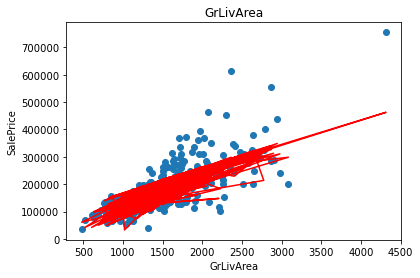

In [73]:
plt.scatter(X_test.loc[:, 'GrLivArea'], y_test)
plt.plot(X_test.loc[:, 'GrLivArea'], reg_pred, "r")
plt.title('GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()



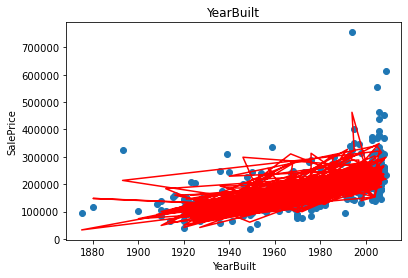

In [74]:
plt.scatter(X_test.loc[:, 'YearBuilt'], y_test)
plt.plot(X_test.loc[:, 'YearBuilt'], reg_pred, "r")
plt.title('YearBuilt')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()

In [9]:
mSE_results = []
model_names = []

## Linear regression

In [10]:
reg = LinearRegression().fit(X_train_trans, y_train)
reg_pred = reg.predict(X_test_trans)

from sklearn.metrics import mean_squared_error
print("MSE:", mean_squared_error(y_true=y_test, y_pred=reg_pred))

mSE_results.append(mean_squared_error(y_true=y_test, y_pred=reg_pred))
model_names.append("Linear regression")

MSE: 2314465092.7320137


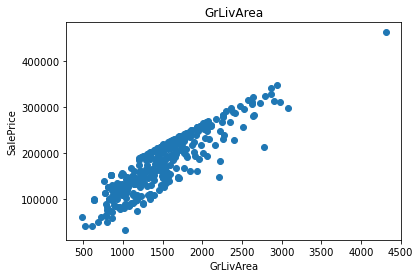

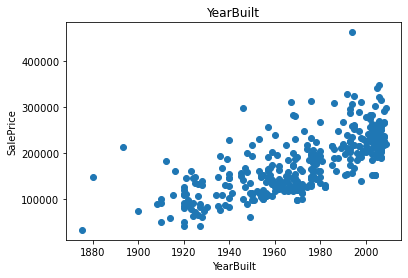

In [11]:
plt.scatter(X_test.loc[:, 'GrLivArea'], reg_pred)
plt.title('GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

plt.scatter(X_test.loc[:, 'YearBuilt'], reg_pred)
plt.title('YearBuilt')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()

<hr>

**[Problem 3] Comparison of methods**

<hr>

## SVC

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train_trans, y_train)
clf_pred = clf.predict(X_test_trans)

print("MSE:", mean_squared_error(y_true=y_test, y_pred=clf_pred))

mSE_results.append(mean_squared_error(y_true=y_test, y_pred=clf_pred))
model_names.append("SVC")

MSE: 3193384428.4328766


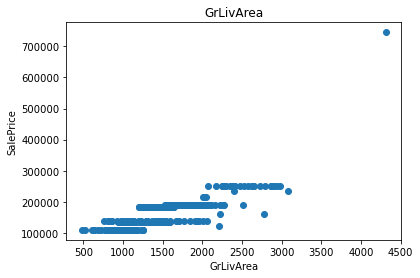

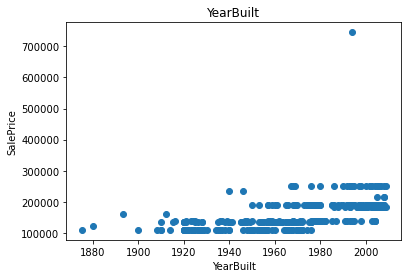

In [13]:
plt.scatter(X_test.loc[:, 'GrLivArea'], clf_pred)
plt.title('GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

plt.scatter(X_test.loc[:, 'YearBuilt'], clf_pred)
plt.title('YearBuilt')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()

## Decision tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0).fit(X_train_trans, y_train)
dtc_pred = dtc.predict(X_test_trans)

print("MSE:", mean_squared_error(y_true=y_test, y_pred=dtc_pred))

mSE_results.append(mean_squared_error(y_true=y_test, y_pred=dtc_pred))
model_names.append("Decision tree")

MSE: 2574250840.367123


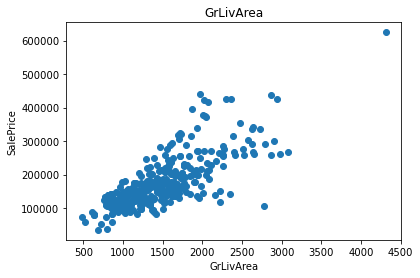

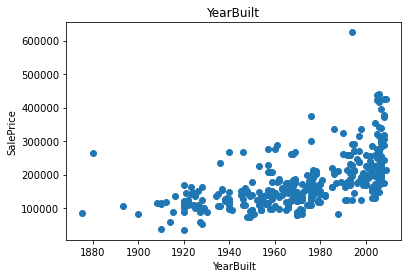

In [15]:
plt.scatter(X_test.loc[:, 'GrLivArea'], dtc_pred)
plt.title('GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

plt.scatter(X_test.loc[:, 'YearBuilt'], dtc_pred)
plt.title('YearBuilt')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()

## Random forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier().fit(X_train_trans, y_train)
rfc_pred = rfc.predict(X_test_trans)

print("MSE:", mean_squared_error(y_true=y_test, y_pred=rfc_pred))

mSE_results.append(mean_squared_error(y_true=y_test, y_pred=rfc_pred))
model_names.append("Random forest")

MSE: 2733724683.021918


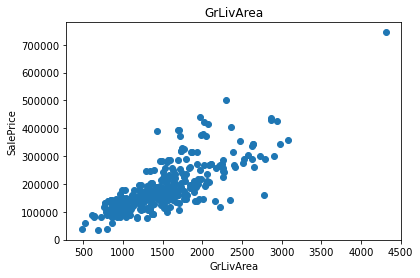

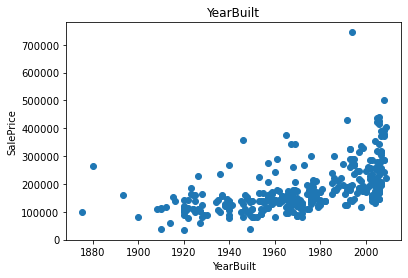

In [17]:
plt.scatter(X_test.loc[:, 'GrLivArea'], rfc_pred)
plt.title('GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

plt.scatter(X_test.loc[:, 'YearBuilt'], rfc_pred)
plt.title('YearBuilt')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()

In [18]:
pd.DataFrame(mSE_results, index=model_names, columns=['MSE'])

,MSE
Linear regression,2.314465e+09
SVC,3.193384e+09
Decision tree,2.574251e+09
Random forest,2.733725e+09
